In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('fake-news/train.csv')


In [3]:
df.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
X=df.drop('label',axis=1)


In [5]:
X.head()


,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y=df['label']


In [7]:
y.head()


0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape


(20800, 5)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer


In [10]:
df=df.dropna()


In [11]:
df.head(10)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
messages=df.copy()


In [13]:
messages.reset_index(inplace=True)


In [14]:
messages.head(10)


,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
messages['title'][6]


'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [20]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\konde\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [22]:
corpus[3]


'civilian kill singl us airstrik identifi'

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [24]:
X.shape


(18285, 5000)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [27]:
print(f"Shape of X: {X.shape}")
print(f"Length of y: {len(y)}")


Shape of X: (18285, 5000)
Length of y: 20800


In [28]:
y = y[:X.shape[0]]


In [32]:
feature_names = cv.get_feature_names_out()

print(feature_names[:20])

['abandon' 'abc' 'abc news' 'abduct' 'abe' 'abedin' 'abl' 'abort' 'abroad'
 'absolut' 'absurd' 'abus' 'abus new' 'abus new york' 'accept' 'access'
 'access pipelin' 'access pipelin protest' 'accid' 'accident']


In [33]:
cv.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [35]:
count_df = pd.DataFrame(X_train, columns=feature_names)


In [36]:
count_df.head()


,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
import matplotlib.pyplot as plt


In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [40]:

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.495
Confusion matrix, without normalization


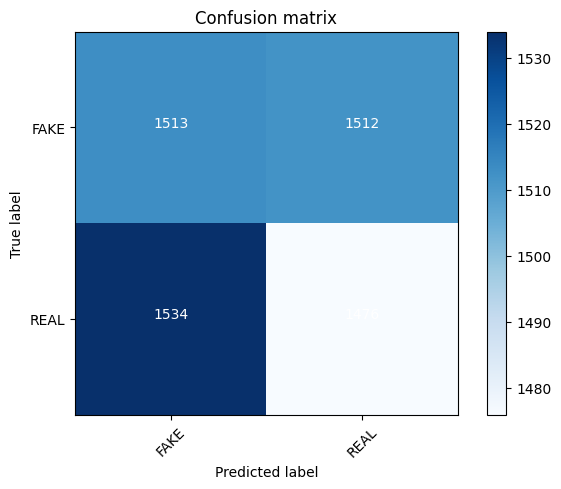

In [41]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [42]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.4952775476387738

In [43]:
y_train.shape


(12250,)

In [49]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.502
Confusion matrix, without normalization


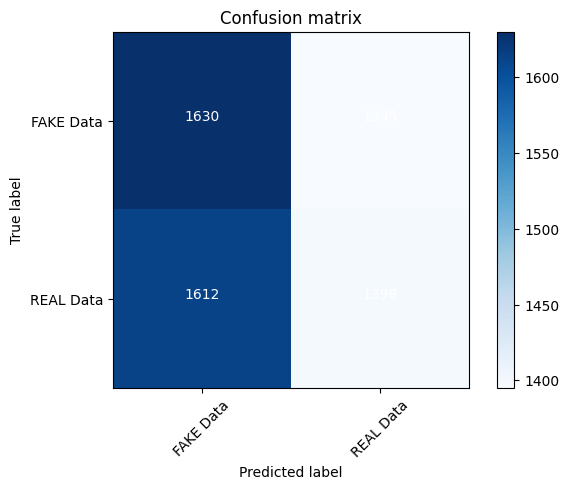

In [50]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [51]:
classifier=MultinomialNB(alpha=0.1)


In [52]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\konde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\konde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0, Score : 0.5012427506213754
Alpha: 0.1, Score : 0.49428334714167355
Alpha: 0.2, Score : 0.49428334714167355
Alpha: 0.30000000000000004, Score : 0.4947804473902237
Alpha: 0.4, Score : 0.49494614747307375
Alpha: 0.5, Score : 0.4947804473902237
Alpha: 0.6000000000000001, Score : 0.49577464788732395
Alpha: 0.7000000000000001, Score : 0.49610604805302405
Alpha: 0.8, Score : 0.495940347970174
Alpha: 0.9, Score : 0.4956089478044739


In [53]:
feature_names = cv.get_feature_names_out()

In [57]:
classifier.feature_log_prob_[0]


array([ -8.88993389,  -8.68722238,  -9.48674996, ..., -10.01127443,
        -9.71500862,  -9.71500862])

In [59]:
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(np.float64(-3.30749415279307), 'new'),
 (np.float64(-3.3862022474910853), 'time'),
 (np.float64(-3.4060698386980057), 'york'),
 (np.float64(-3.4065366049499453), 'new york'),
 (np.float64(-3.4239619304772457), 'york time'),
 (np.float64(-3.4239619304772457), 'new york time'),
 (np.float64(-4.012166754913317), 'trump'),
 (np.float64(-4.386510286193127), 'breitbart'),
 (np.float64(-5.130826375295572), 'clinton'),
 (np.float64(-5.138712851502487), 'hillari'),
 (np.float64(-5.362582451493851), 'donald'),
 (np.float64(-5.37587610023715), 'donald trump'),
 (np.float64(-5.6737583395884945), 'elect'),
 (np.float64(-5.8561700311339635), 'obama'),
 (np.float64(-5.883584028570555), 'say'),
 (np.float64(-5.8947635748552525), 'hillari clinton'),
 (np.float64(-5.976728683777258), 'presid'),
 (np.float64(-6.03320542210422), 'state'),
 (np.float64(-6.142230919766744), 'video'),
 (np.float64(-6.178891916829915), 'war')]

In [60]:
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:5000]


[(np.float64(-11.18134568518487), 'abe'),
 (np.float64(-11.18134568518487), 'acr'),
 (np.float64(-11.18134568518487), 'agenda breitbart'),
 (np.float64(-11.18134568518487), 'applaud'),
 (np.float64(-11.18134568518487), 'bay'),
 (np.float64(-11.18134568518487), 'behind trump'),
 (np.float64(-11.18134568518487), 'berkeley breitbart'),
 (np.float64(-11.18134568518487), 'bias'),
 (np.float64(-11.18134568518487), 'bill cunningham'),
 (np.float64(-11.18134568518487), 'bowl ad'),
 (np.float64(-11.18134568518487), 'bribe'),
 (np.float64(-11.18134568518487), 'campaign breitbart'),
 (np.float64(-11.18134568518487), 'circuit'),
 (np.float64(-11.18134568518487), 'comment trump'),
 (np.float64(-11.18134568518487), 'common core'),
 (np.float64(-11.18134568518487), 'corner'),
 (np.float64(-11.18134568518487), 'cunningham'),
 (np.float64(-11.18134568518487), 'davo'),
 (np.float64(-11.18134568518487), 'der'),
 (np.float64(-11.18134568518487), 'donald trump victori'),
 (np.float64(-11.18134568518487), '